In [ ]:
import re
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle
import matplotlib.patches as mpatches
import matplotlib.lines as mlines
from scipy.stats import pearsonr
import numpy as np
import seaborn as sns

In [ ]:
path_data = "data/"
# Load the entire labelled dataset
df = pd.read_csv(path_data + "entire_dataset_labeled_final.csv")
# Filter the rows with labels == 1
df = df[df['labels'] == 1]

In [ ]:
len(df)

338641

In [ ]:
len(df.author_id.unique())

27016

In [ ]:
# Extract week information from the 'created_at' column
df['created_at'] = pd.to_datetime(df['created_at'])
df['week'] = df['created_at'].dt.strftime('%Y-%U')

In [ ]:
# Initialize a dictionary to store hashtag counts
hashtag_counts = {}

# Regular expression pattern to match hashtags
pattern = re.compile(r'#\w+')

# Iterate over each tweet's text
for text in df['tweet']:
    # Find all hashtags in the tweet
    hashtags = pattern.findall(text)

    # Increment the count for each hashtag
    for hashtag in hashtags:
        if hashtag in hashtag_counts:
            hashtag_counts[hashtag] += 1
        else:
            hashtag_counts[hashtag] = 1

# Sort the hashtag counts in descending order
sorted_hashtags = sorted(hashtag_counts.items(), key=lambda x: x[1], reverse=True)

# Print the top 10 most used hashtags
top_hashtags = sorted_hashtags[:30]
for hashtag, count in top_hashtags:
    print(f"{hashtag}: {count} times")


#NonAuPassDeLaHonte: 88461 times
#DictatureSanitaire: 73627 times
#NonAuPassSanitaire: 69817 times
#StopDictatureSanitaire: 69396 times
#NousSommesDesMillions: 48163 times
#PassSanitaire: 29838 times
#NonAuVaccinObligatoire: 29159 times
#NonALaVaccinationObligatoire: 27607 times
#NonAuPassVaccinal: 27498 times
#COVID19: 25566 times
#NousSavons: 19651 times
#PassDeLaHonte: 14596 times
#Resistance: 13947 times
#Macron: 11686 times
#Covid_19: 11047 times
#MacronDestitution: 10458 times
#PassSanitaireDeLaHonte: 10032 times
#NonAuPasseDeLaHonte: 9559 times
#antivax: 8853 times
#France: 7410 times
#TouchezPasAuxEnfants: 7364 times
#NonAuPasseportSanitaire: 6784 times
#DictatureEnMarche: 6604 times
#JeNeMeVaccineraiPas: 6299 times
#GiletsJaunes: 6197 times
#Vaccin: 6149 times
#vaccination: 5751 times
#StopCouvreFeu: 5606 times
#AntiPassSanitaire: 5559 times
#touchepasamesenfants: 5491 times


In [ ]:
# Initialize lists to store the counts of new and continuing users
new_counts = []
continuing_counts = []

# Sort the DataFrame by week
df = df.sort_values('week')

weeks = df['week'].copy()

# Iterate over the unique weeks
for week in df['week'].unique():
    # Filter the DataFrame for the current week
    week_df = df[df['week'] == week]

    # Find the unique authors for the current week
    unique_authors = week_df['author_id'].unique()

    # Find the authors who posted for the first time in the current week
    new_authors = len(set(unique_authors) - set(df[df['week'] < week]['author_id'].unique()))

    # Find the authors who posted in previous weeks
    continuing_authors = len(set(unique_authors) & set(df[df['week'] < week]['author_id'].unique()))

    # Append counts to lists
    new_counts.append(new_authors)
    continuing_counts.append(continuing_authors)

# Create a DataFrame to store the counts
counts_df = pd.DataFrame({
    'Week': df['week'].unique(),
    'New Users': new_counts,
    'Persistent Users': continuing_counts
})

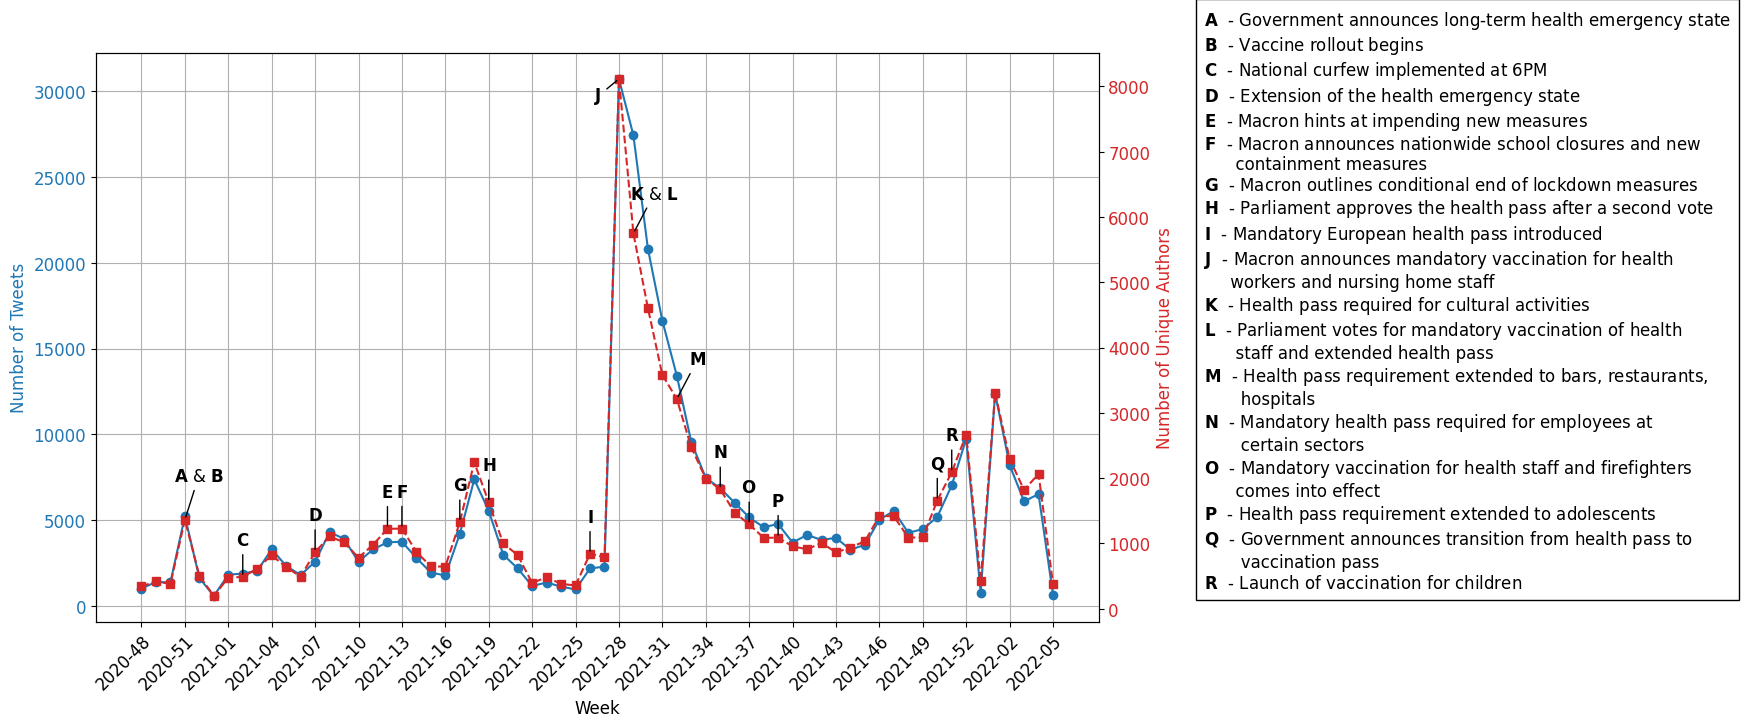

In [ ]:
path_folder = ""

# Sort the DataFrame by week
df = df.sort_values('week')

weeks = df['week'].copy()

# Set minimum font size for the figure
plt.rcParams.update({'font.size': 12})

annotation_dates = {
    pd.Period('2020-12-21'): '- Government announces long-term health emergency state',
    pd.Period('2020-12-27'): '- Vaccine rollout begins',
    pd.Period('2021-01-15'): '- National curfew implemented at 6PM',
    pd.Period('2021-02-15'): '- Extension of the health emergency state',
    pd.Period('2021-03-25'): "- Macron hints at impending new measures",
    pd.Period('2021-03-31'): "- Macron announces nationwide school closures and new\n      containment measures",
    pd.Period('2021-04-29'): '- Macron outlines conditional end of lockdown measures',
    pd.Period('2021-05-11'): '- Parliament approves the health pass after a second vote',
    pd.Period('2021-07-01'): '- Mandatory European health pass introduced',
    pd.Period('2021-07-12'): '- Macron announces mandatory vaccination for health\n     workers and nursing home staff',
    pd.Period('2021-07-21'): '- Health pass required for cultural activities',
    pd.Period('2021-07-25'): '- Parliament votes for mandatory vaccination of health\n      staff and extended health pass',
    pd.Period('2021-08-09'): '- Health pass requirement extended to bars, restaurants,\n       hospitals',
    pd.Period('2021-08-30'): '- Mandatory health pass required for employees at\n       certain sectors',
    pd.Period('2021-09-15'): '- Mandatory vaccination for health staff and firefighters\n      comes into effect',
    pd.Period('2021-09-30'): '- Health pass requirement extended to adolescents',
    pd.Period('2021-12-17'): '- Government announces transition from health pass to\n       vaccination pass',
    pd.Period('2021-12-22'): '- Launch of vaccination for children'
}

letters = ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R']

# Annotation weeks and texts
annotation_weeks = {
    pd.Period('2020-12-21', freq='W').strftime('%Y-%W'): r'$\mathbf{A}$',
    pd.Period('2020-12-27', freq='W').strftime('%Y-%W'): r'$\mathbf{A}$ & $\mathbf{B}$',
    pd.Period('2021-01-15', freq='W').strftime('%Y-%W'): r'$\mathbf{C}$',
    pd.Period('2021-02-15', freq='W').strftime('%Y-%W'): r'$\mathbf{D}$',
    pd.Period('2021-03-25', freq='W').strftime('%Y-%W'): r'$\mathbf{E}$',
    pd.Period('2021-03-31', freq='W').strftime('%Y-%W'): r'$\mathbf{F}$',
    pd.Period('2021-04-29', freq='W').strftime('%Y-%W'): r'$\mathbf{G}$',
    pd.Period('2021-05-11', freq='W').strftime('%Y-%W'): r'$\mathbf{H}$',
    pd.Period('2021-07-01', freq='W').strftime('%Y-%W'): r'$\mathbf{I}$',
    pd.Period('2021-07-12', freq='W').strftime('%Y-%W'): r'$\mathbf{J}$',
    pd.Period('2021-07-22', freq='W').strftime('%Y-%W'): r'$\mathbf{K}$',
    pd.Period('2021-07-25', freq='W').strftime('%Y-%W'): r'$\mathbf{K}$ & $\mathbf{L}$',
    pd.Period('2021-08-09', freq='W').strftime('%Y-%W'): r'$\mathbf{M}$',
    pd.Period('2021-08-30', freq='W').strftime('%Y-%W'): r'$\mathbf{N}$',
    pd.Period('2021-09-15', freq='W').strftime('%Y-%W'): r'$\mathbf{O}$',
    pd.Period('2021-09-30', freq='W').strftime('%Y-%W'): r'$\mathbf{P}$',
    pd.Period('2021-12-17', freq='W').strftime('%Y-%W'): r'$\mathbf{Q}$',
    pd.Period('2021-12-22', freq='W').strftime('%Y-%W'): r'$\mathbf{R}$'
}

# Create combined legend with letters and events, adding spaces after each letter
combined_legend = {letter: f"$\\mathbf{{{letter}}}\\ $ {event}" for letter, event in zip(letters, annotation_dates.values())}

# Sort the combined legend by the original order of letters
combined_legend = {letter: combined_legend[letter] for letter in letters}

# Join letters and events
combined_legend_text = '\n'.join(combined_legend.values())

# Calculate the number of tweets per week for the entire dataset
tweets_per_week = df['week'].value_counts().sort_index()

# Group tweets by week and count the number of unique authors per week
authors_per_week = df.groupby('week')['author_id'].nunique().sort_index()

# Plotting the number of tweets and unique authors per week for the entire dataset
fig, ax1 = plt.subplots(figsize=(12, 7))

# Adjust x-axis labels
# Set xticks to show every other tick and label
plt.xticks(ticks=counts_df.index[::3], labels=counts_df['Week'][::3], rotation=45, ha='right', fontsize=12, rotation_mode="anchor")

# Plot number of tweets
color = 'tab:blue'
ax1.set_xlabel('Week')
ax1.set_ylabel('Number of Tweets', color=color)
ax1.plot(tweets_per_week.index, tweets_per_week.values, marker='o', linestyle='-', color=color)
ax1.tick_params(axis='y', labelcolor=color)
# Add grid
ax1.grid(True)

# Create a secondary y-axis for unique authors
ax2 = ax1.twinx()
color = 'tab:red'
ax2.set_ylabel('Number of Unique Authors', color=color)
ax2.plot(authors_per_week.index, authors_per_week.values, marker='s', linestyle='--', color=color)
ax2.tick_params(axis='y', labelcolor=color)

# Annotate the plot with the specified weeks and texts
for week, text in annotation_weeks.items():
    # Get the index of the week in the DataFrame
    idx = counts_df[counts_df['Week'] == week]['Week'].index[0]

    # Calculate the position for the annotation
    x_pos = idx
    y_pos = counts_df.loc[idx, 'New Users'] + counts_df.loc[idx, 'Persistent Users']

    # Adjust the xytext parameter for each annotation to ensure they fit within the plot area
    xytext_offset = (0, 20)  # Default offset
    if week == '2020-51':
        xytext_offset = (10, 25)  # Adjust the offset for July 12th, 2021
    if week == '2021-28':
        xytext_offset = (-15, -20)  # Adjust the offset for July 12th, 2021
    if week == '2021-29':
        xytext_offset = (15, 22)  # Adjust the offset for July 12th, 2021
    if week == '2021-32':
        xytext_offset = (15, 22)  # Adjust the offset for July 12th, 2021

    plt.annotate(text, xy=(x_pos, y_pos), xytext=xytext_offset,
                 textcoords='offset points', ha='center', va='bottom', fontsize=12,
                 arrowprops=dict(arrowstyle='-', connectionstyle='arc3,rad=0', color='black'))

# Create a legend box outside the plot with a bigger size and font size
plt.figtext(1.01, 0.21, combined_legend_text,
             bbox=dict(facecolor='white', edgecolor='black', boxstyle='square,pad=0.5'),
             fontsize=12)

# Add title
#plt.title('Number of Tweets and Unique Authors per Week for the Entire Dataset', fontsize=13)

plt.tight_layout()
plt.savefig(path_folder+"figures/number_tweets_authors.png", bbox_inches='tight', dpi=600)
plt.show()

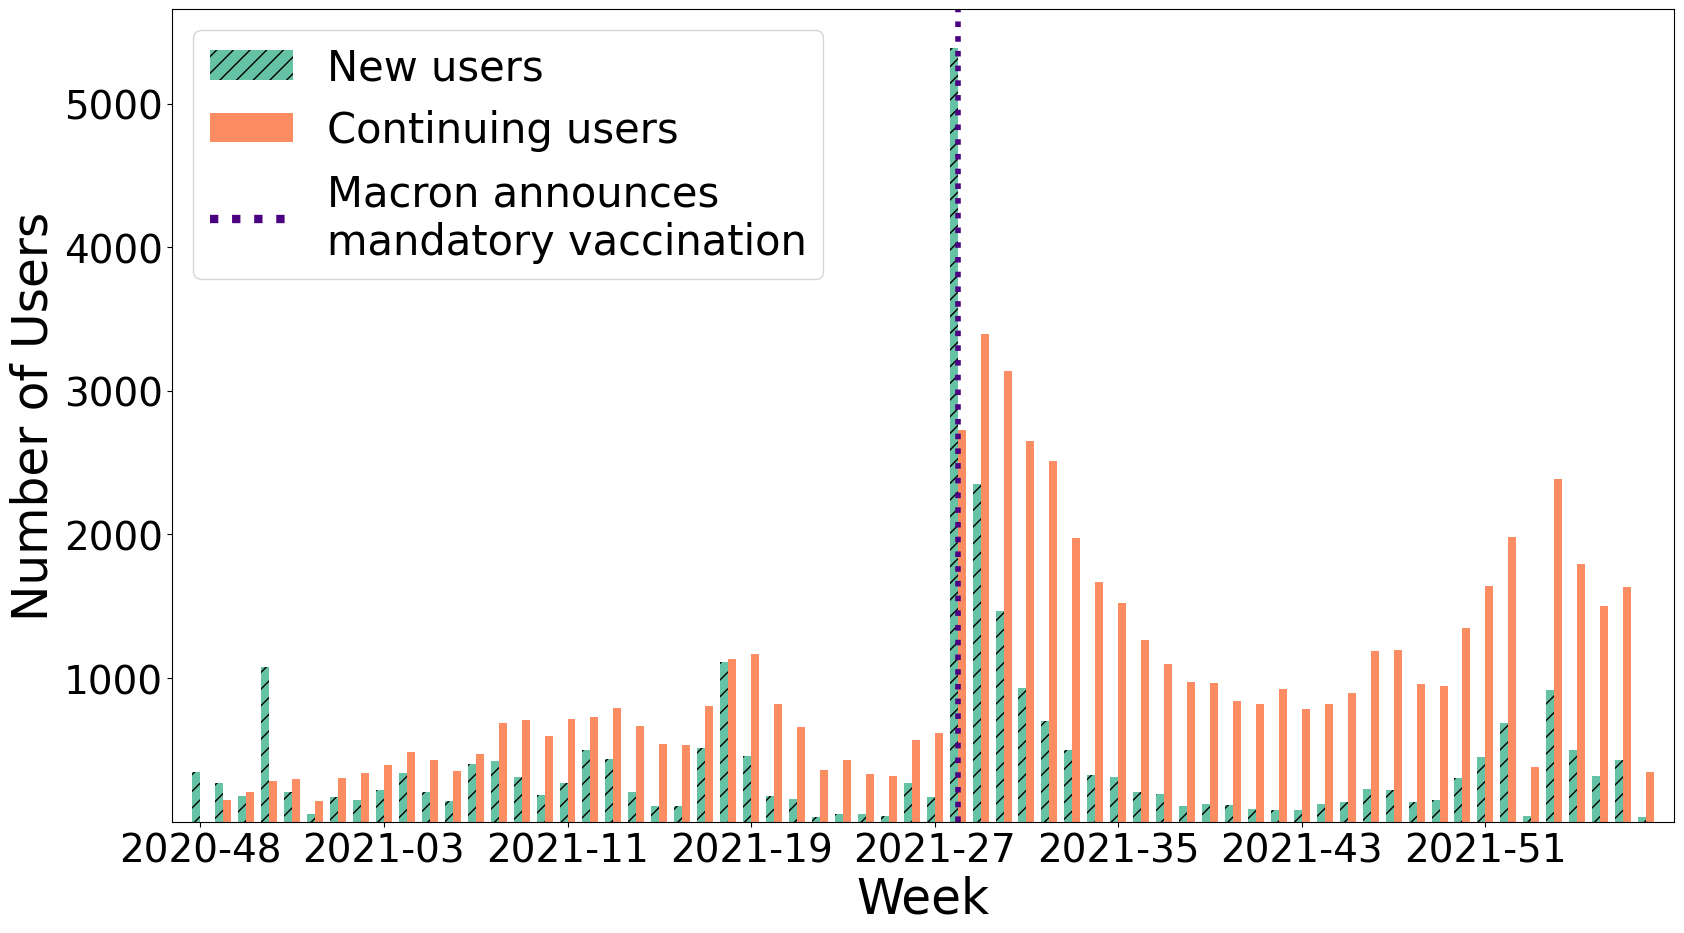

In [ ]:
# Filter to keep only the relevant annotation for the event
relevant_week = pd.Period('2021-07-12', freq='W').strftime('%Y-%W')
relevant_annotation = {relevant_week: 'Macron announces mandatory vaccination'}

# Improved color palette for better visual appeal
sns.set_palette("Set2")

# Highlight colors
highlight_line_color = '#4B0082'
highlight_fill_color = 'lightcoral'
regular_color_new_users = sns.color_palette("Set2")[0]
regular_color_persistent_users = sns.color_palette("Set2")[1]

# Set the positions for side-by-side bars with increased space
bar_width = 0.4  # Narrower bar width to create more space
bar_spacing = 0.15  # Additional spacing between groups of bars
indices = np.arange(len(counts_df)) * (1 + bar_spacing)  # Add spacing between the bars

# Create the figure
fig, ax = plt.subplots(figsize=(17, 10))

# Get the correct index for the week '2021-28' (replace '2021-28' with your specific week if necessary)
idx = counts_df[counts_df['Week'] == '2021-28'].index[0]  # Make sure this corresponds to your relevant week
x_pos = indices[idx]  # Get the exact position for the x-axis

# Draw a vertical dotted red line at the relevant week (aligned to x_pos)
#ax.axvline(x=x_pos-0.5, color=highlight_line_color, linestyle='dotted', linewidth=2)

# Shade the area to the right of the relevant week
#ax.axvspan(x_pos-0.5, indices[-1] + bar_width + 1, facecolor="grey", alpha=0.15)

# Plot side-by-side bars for new users and continuing users with hatching for continuing users
ax.bar(indices - bar_width/2, counts_df['New Users'], bar_width, hatch='//', color=regular_color_new_users, label='New Users')
ax.bar(indices + bar_width/2, counts_df['Persistent Users'], bar_width, color=regular_color_persistent_users, label='Continuing Users')

# Set x-axis limits to remove excess white space
ax.set_xlim([indices[0] - 1 - bar_width, indices[-1] + bar_width + 1])

# Set xticks with week labels
plt.xticks(ticks=indices[::8], labels=counts_df['Week'][::8], fontsize=28)

# Set yticks
plt.yticks(ticks=[i for i in range(1000, 6000, 1000)], fontsize=28)

# Add labels and title
plt.ylabel('Number of Users', fontsize=35)
plt.xlabel('Week', fontsize=35)

# Customize the legend for better clarity
handles = [
    mpatches.Patch(facecolor=regular_color_new_users, label='New users'),  # Create custom rectangle for hatching
    mpatches.Patch(facecolor=regular_color_persistent_users, label='Continuing users'),
    mlines.Line2D([0], [1], color=highlight_line_color, linestyle='dotted', linewidth=6, label='Macron announces\nmandatory vaccination'),
    #mpatches.Patch(facecolor='grey', alpha=0.15, label='Post-announcement period')
]

for i, handle in enumerate(handles):
  if i ==0:
    handle.set_hatch('//')

ax.legend(handles=handles, fontsize=30, loc='upper left')

# Draw vertical line at the speech week
ax.axvline(x=x_pos, color=highlight_line_color, linestyle='dotted', linewidth=4)

# # Legend handles
# handles = [
#     mpatches.Patch(facecolor=regular_color_new_users, label='New users', hatch='//'),
#     mpatches.Patch(facecolor=regular_color_persistent_users, label='Continuing users'),
#     mlines.Line2D([], [], color=highlight_line_color, linestyle='dotted', linewidth=3,
#                   label='Macron announces mandatory\nvaccination')
# ]

# Adjust the layout and show the plot
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.savefig(path_folder + "figures/new_vs_continuing_highlighted_frame_separate_bars_low.png", bbox_inches='tight', dpi=200)
plt.show()


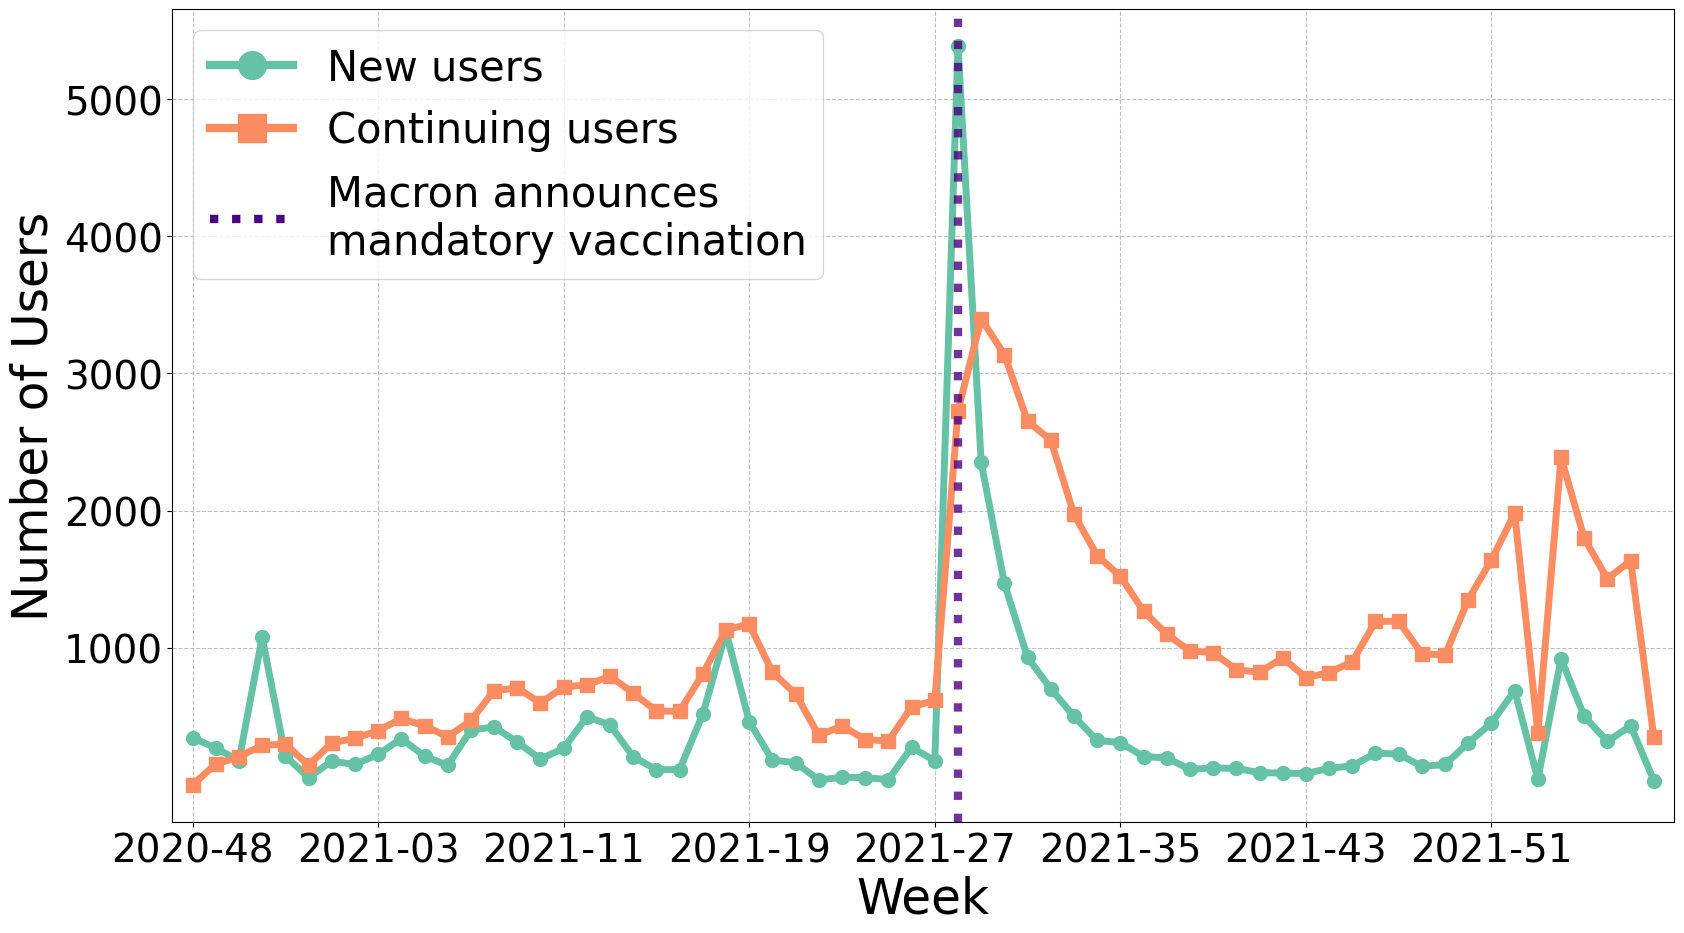

In [ ]:
# Create the figure
fig, ax = plt.subplots(figsize=(17, 10))

# Plot line for New Users
ax.plot(indices, counts_df['New Users'],
        color=regular_color_new_users,
        marker='o', linewidth=5, markersize=10,
        label='New users')

# Plot line for Continuing Users
ax.plot(indices, counts_df['Persistent Users'],
        color=regular_color_persistent_users,
        marker='s', linewidth=5, markersize=10,
        label='Continuing users')

# Vertical line for Macron speech
ax.axvline(x=x_pos, color=highlight_line_color, linestyle='dotted', linewidth=6, alpha=0.8)

# Legend handles
handles = [
    mlines.Line2D([], [], color=regular_color_new_users, marker='o', linewidth=6, markersize=20, label='New users'),
    mlines.Line2D([], [], color=regular_color_persistent_users, marker='s', linewidth=6, markersize=20, label='Continuing users'),
    mlines.Line2D([], [], color=highlight_line_color, linestyle='dotted', linewidth=6,
                  label='Macron announces\nmandatory vaccination')
]
ax.legend(handles=handles, fontsize=30, loc='upper left')

# Set x-axis
ax.set_xlim([indices[0] - 1, indices[-1] + 1])
plt.xticks(ticks=indices[::8], labels=counts_df['Week'][::8], fontsize=28)

# Set y-axis
plt.yticks(ticks=[i for i in range(1000, 5900, 1000)], fontsize=28)

# Labels
plt.ylabel('Number of Users', fontsize=35)
plt.xlabel('Week', fontsize=35)

# Add grid
ax.grid(True, linestyle='--', alpha=0.8)

plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.savefig(path_folder + "figures/new_vs_continuing_lines.png", bbox_inches='tight', dpi=200)
plt.show()

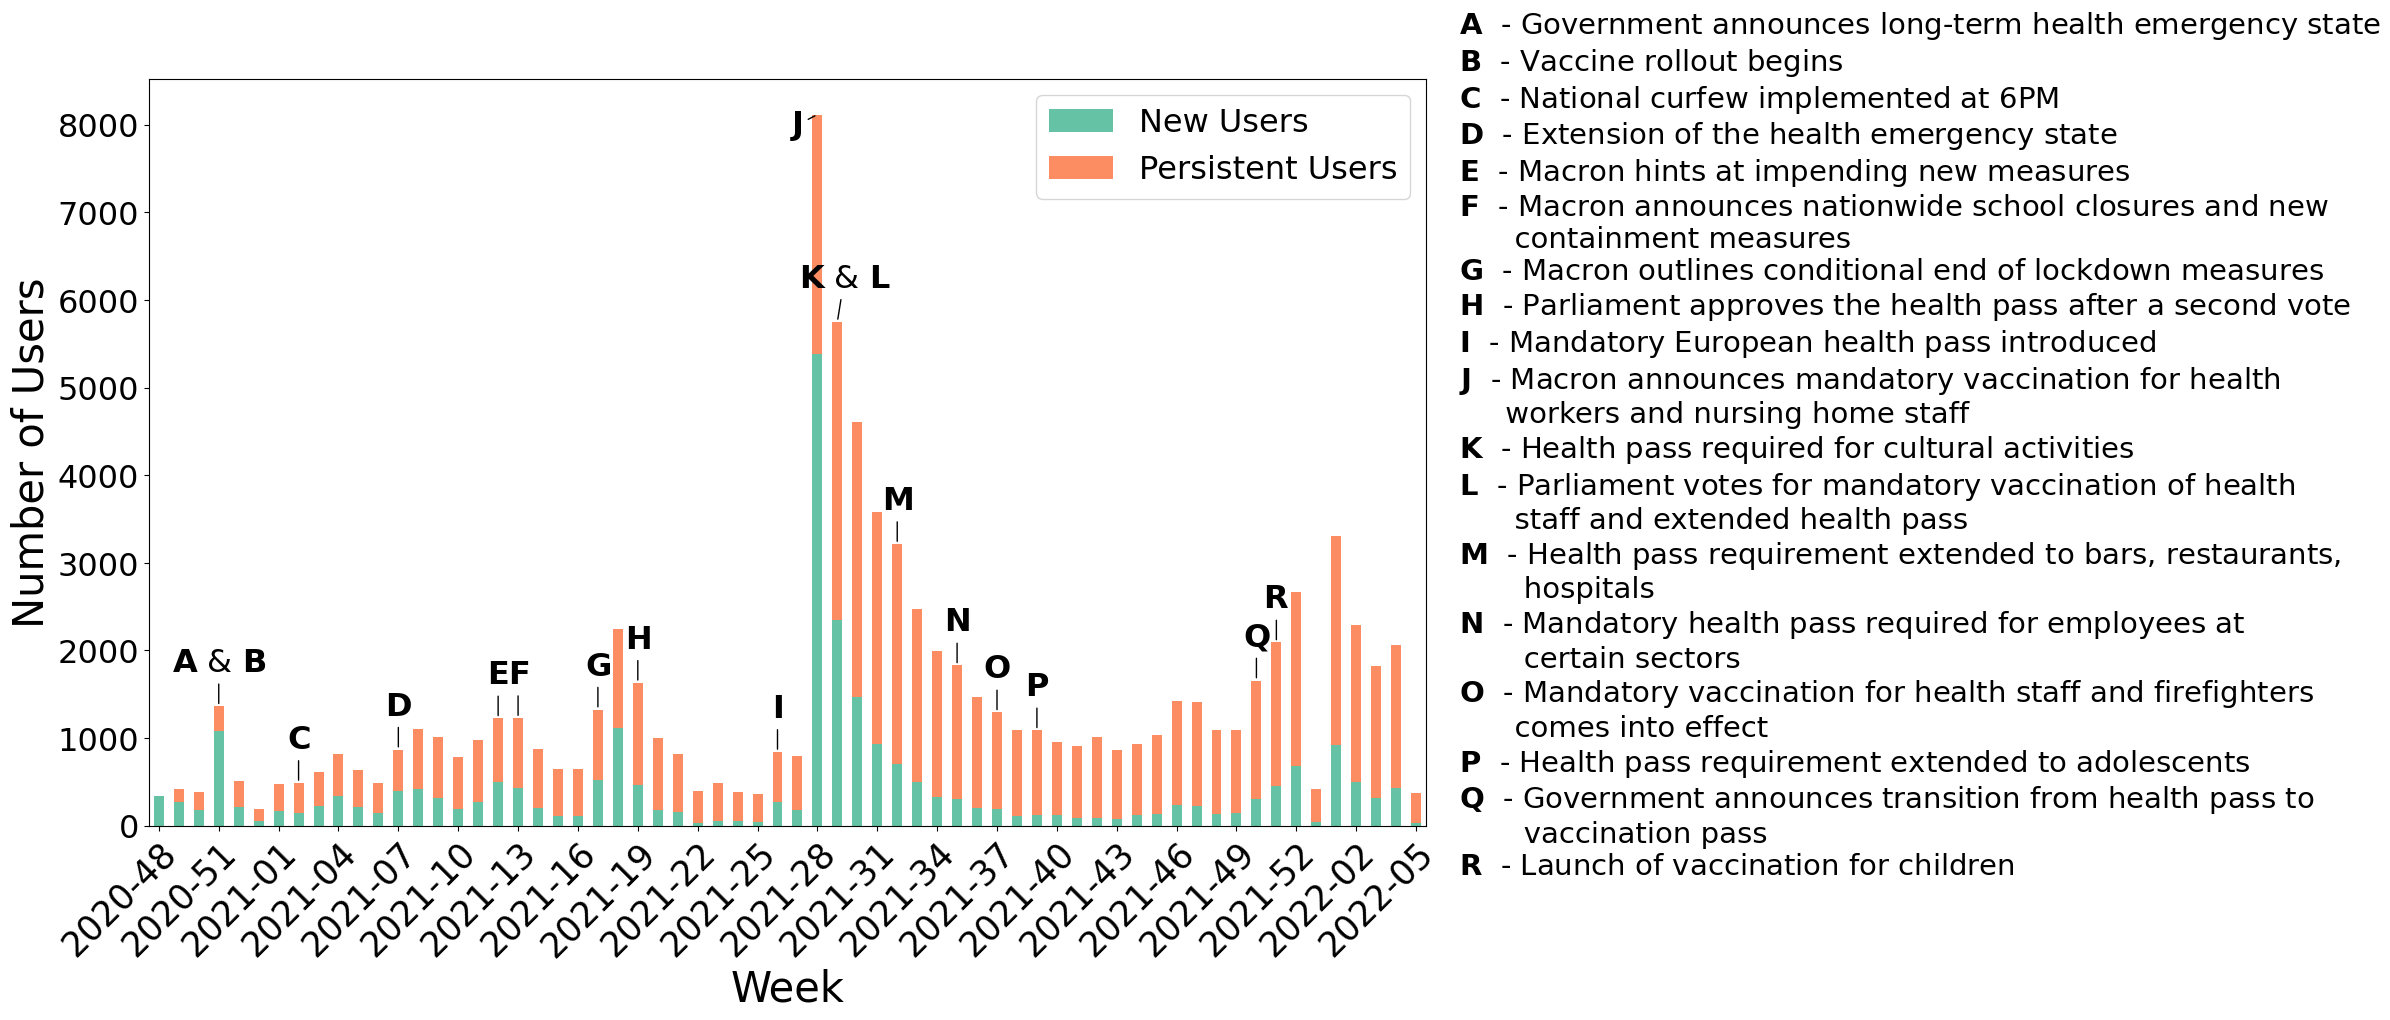

In [ ]:
# Convert 'created_at' column to datetime type
#df['created_at'] = pd.to_datetime(df['created_at'])

# Extract the week from the 'created_at' column
#df['week'] = df['created_at'].dt.to_period('W')
# Set minimum font size for the figure
plt.rcParams.update({'font.size': 23})

# Plotting
ax = counts_df.plot(x='Week', y=['New Users', 'Persistent Users'], kind='bar', stacked=True, figsize=(15, 10))

# Annotate the plot with the specified weeks and texts
for week, text in annotation_weeks.items():
    # Get the index of the week in the DataFrame
    idx = counts_df[counts_df['Week'] == week]['Week'].index[0]

    # Calculate the position for the annotation
    x_pos = idx
    y_pos = counts_df.loc[idx, 'New Users'] + counts_df.loc[idx, 'Persistent Users']

    # Adjust the xytext parameter for each annotation to ensure they fit within the plot area
    xytext_offset = (0, 20)  # Default offset
    if week == '2021-28':
        xytext_offset = (-15, -20)  # Adjust the offset for July 12th, 2021
    if week == '2021-29':
        xytext_offset = (5, 20)  # Adjust the offset for July 12th, 2021

    plt.annotate(text, xy=(x_pos, y_pos), xytext=xytext_offset,
                 textcoords='offset points', ha='center', va='bottom',
                 arrowprops=dict(arrowstyle='-', connectionstyle='arc3,rad=0', color='black'))

plt.xlabel('Week')
plt.ylabel('Number of Users')
#plt.title('Frequency of New and Continuing Users Each Week')

# Set xticks to show every other tick and label
plt.xticks(ticks=counts_df.index[::3], labels=counts_df['Week'][::3], rotation=45, ha='right', fontsize=25, rotation_mode="anchor")

# Create a legend box outside the plot with a bigger size and font size
plt.figtext(0.989, 0.17, combined_legend_text,
             bbox=dict(facecolor='white', edgecolor='white', boxstyle='square,pad=0.6', linewidth=1),
             fontsize=21)

plt.xlabel('Week', fontsize=30)  # Set the font size for the x-axis label
plt.ylabel('Number of Users', fontsize=30)  # Set the font size for the y-axis label

plt.tight_layout(rect=[0, 0, 1, 1])
plt.savefig(path_folder + "figures/new_continuing_users_different_event_low.png", bbox_inches='tight', dpi=200)

plt.show()

Pearson correlation coefficient: 0.9871611614183351
P-value: 4.1586393771452566e-51


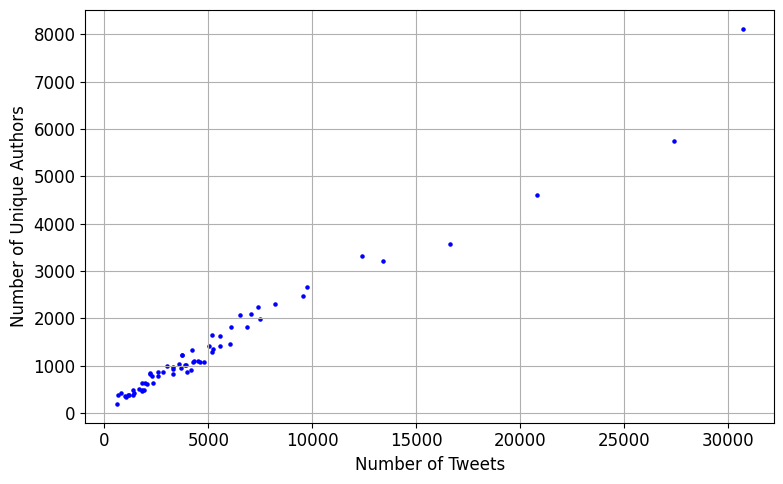

In [ ]:
# Calculate Pearson correlation coefficient and p-value
correlation_coefficient, p_value = pearsonr(tweets_per_week, authors_per_week)

# Print the correlation coefficient and p-value
print(f"Pearson correlation coefficient: {correlation_coefficient}")
print(f"P-value: {p_value}")

plt.rcParams.update({'font.size': 12})

# Visualize the correlation
plt.figure(figsize=(8, 5))
plt.scatter(tweets_per_week, authors_per_week, color='b', s=5)
#plt.title('Correlation between Number of Tweets and Number of Unique Authors per Week')
plt.xlabel('Number of Tweets')
plt.ylabel('Number of Unique Authors')
plt.grid(True)
plt.tight_layout()
plt.savefig(path_folder + "figures/correlation_tweets_authors.png", dpi=600)
plt.show()